In [1]:
import pandas as pd
import datetime
import plotly.express as px 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import joblib 
import pyarrow

In [2]:
raw_df = pd.read_csv("/Users/swapneelpremchand/SciKit-Learn/MedicalBill(LR)/weather-dataset-rattle-package/weatherAUS.csv")

In [3]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
raw_df.dropna(subset=(['RainToday','RainTomorrow']), inplace=True)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [6]:
px.scatter(raw_df.sample(2000) , x = 'MinTemp' , y = 'MaxTemp' , color='RainToday')


In [7]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]


In [8]:
input_cols = list(raw_df.columns)[1:-1]
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [9]:
target_cols = 'RainTomorrow'

In [10]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

print(train_inputs)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1  

In [11]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [12]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [13]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_inputs.select_dtypes('object').columns.tolist()
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [16]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [19]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder= OneHotEncoder(sparse_output=False , handle_unknown='ignore').fit(raw_df[categorical_cols])
print(encoder.categories_)

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object), array(['E', 'ENE'

In [22]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [23]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/var/folders/v4/yvb3yqbx0jg9p22hslzz7cj00000gn/T/ipykernel_58657/1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/v4/yvb3yqbx0jg9p22hslzz7cj00000gn/T/ipykernel_58657/1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/v4/yvb3yqbx0jg9p22hslzz7cj00000gn/T/ipykernel_58657/1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [24]:
X_train = train_inputs[encoded_cols + numeric_cols]
X_val = val_inputs[encoded_cols + numeric_cols]
X_test = test_inputs[encoded_cols + numeric_cols]

In [25]:
X_train

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184615,0.298851,0.22,0.13,0.555372,0.5232,0.492351,0.499917,0.651899,0.714012
144549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146154,0.229885,0.16,0.08,0.530579,0.4880,0.492351,0.499917,0.761603,0.771593
144550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200000,0.103448,0.15,0.08,0.519008,0.4944,0.492351,0.499917,0.778481,0.788868
144551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215385,0.195402,0.22,0.09,0.553719,0.5136,0.492351,0.499917,0.780591,0.817658


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier(random_state=40)

In [28]:
%%time 

model.fit(X_train , train_targets)

CPU times: user 1.22 s, sys: 21.3 ms, total: 1.24 s
Wall time: 1.25 s


DecisionTreeClassifier(random_state=40)

In [29]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [30]:
train_preds = model.predict(X_train)

print(train_preds)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [31]:
pd.value_counts(train_preds)
acc = accuracy_score(train_targets , train_preds)
print(acc)



0.9999795893374699


/var/folders/v4/yvb3yqbx0jg9p22hslzz7cj00000gn/T/ipykernel_58657/571232557.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



# KARGYA OVERFIT LMAO

In [32]:
train_prob = model.predict_proba(X_train)
print(train_prob)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [33]:
val_pred = model.predict(X_val)

acc = accuracy_score(val_targets , val_pred)

print(acc)


0.7938439932120077


In [34]:
from sklearn.tree import plot_tree , export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

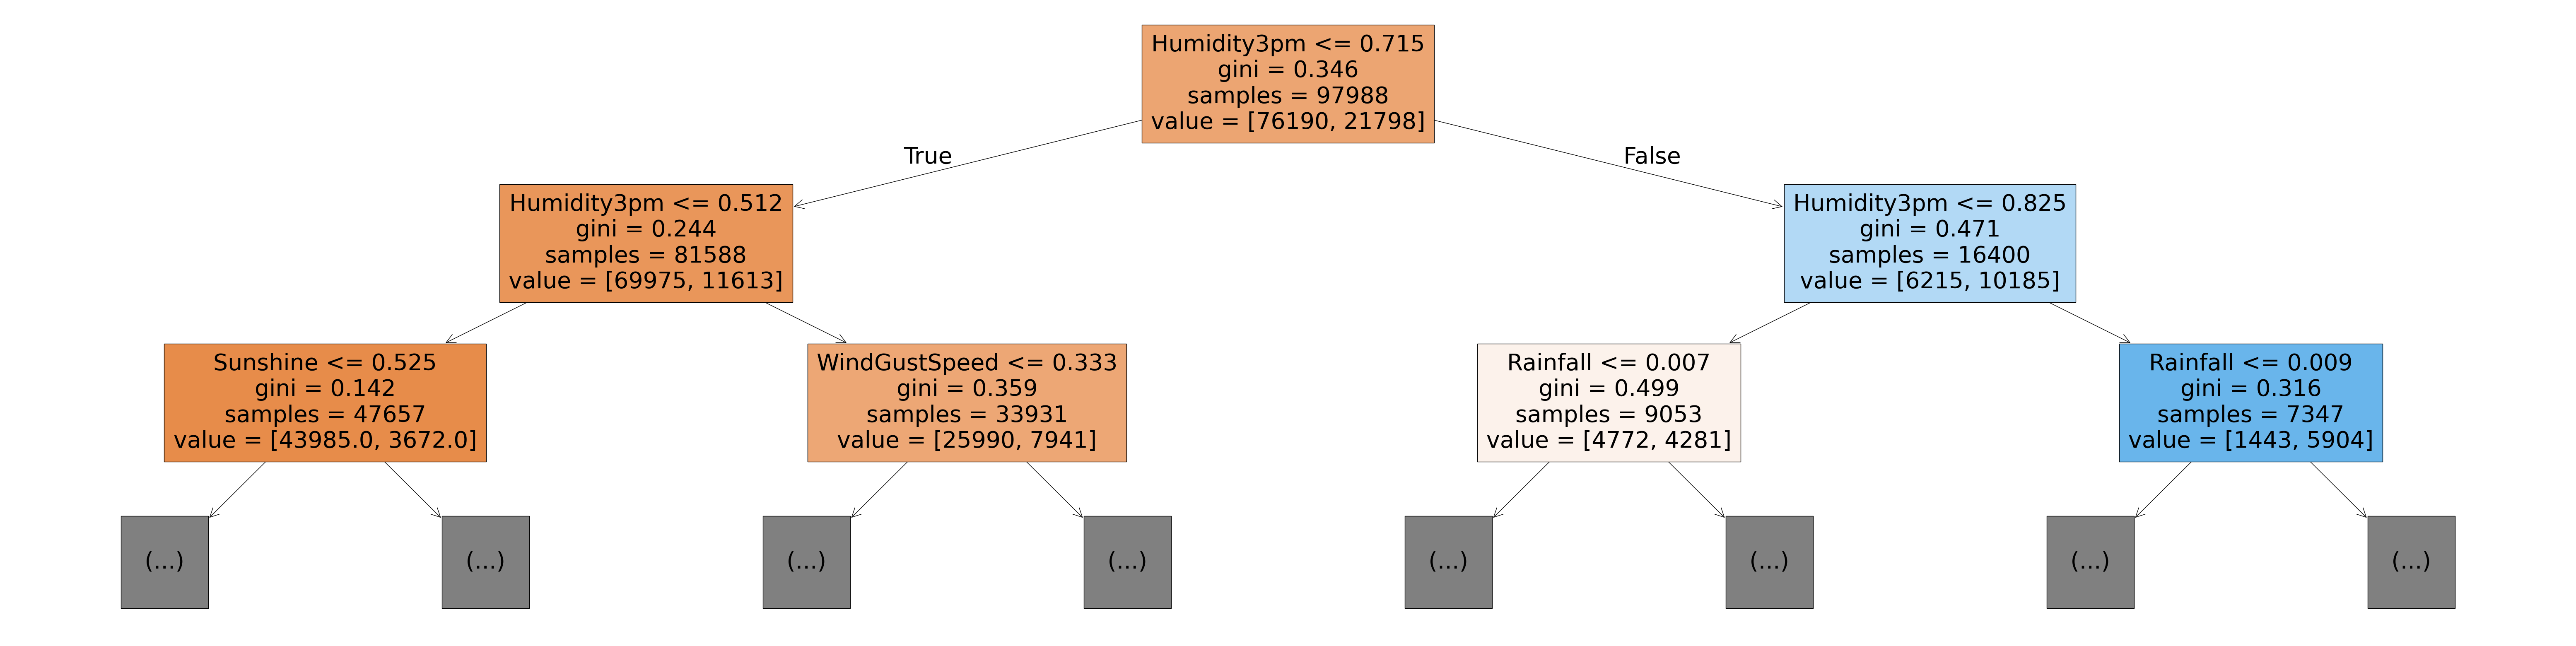

In [35]:
plt.figure(figsize=(80,20))
plot_tree(model , feature_names= X_test.columns , max_depth= 2 , filled= True)

In [36]:
model.tree_.max_depth

49

In [37]:
#easier intepretation of huge trees , 
# we can use text 

tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

In [38]:
model.feature_importances_

array([1.76904292e-03, 1.99542994e-03, 1.08459114e-03, 6.76107607e-04,
       1.25113144e-03, 1.00824562e-03, 1.16576675e-03, 1.96310657e-03,
       8.51872201e-04, 1.16636905e-03, 8.73185925e-04, 2.30466938e-03,
       1.62579101e-03, 5.76578906e-04, 7.78520659e-04, 1.35049165e-03,
       1.05922292e-04, 1.46666634e-03, 1.11901765e-03, 1.40928038e-03,
       9.79666956e-04, 9.68158327e-04, 1.30474088e-03, 1.72921469e-03,
       6.13374660e-04, 6.93284695e-04, 1.04114753e-03, 1.49440337e-03,
       1.26813106e-03, 1.09708503e-03, 4.03714959e-04, 1.59194172e-03,
       1.64063340e-03, 1.97569180e-03, 1.04989265e-03, 2.00064029e-03,
       1.21682576e-03, 2.10310432e-03, 1.26036680e-03, 4.40449883e-04,
       1.47232307e-03, 2.64575261e-04, 1.01217918e-03, 1.78680398e-03,
       1.33005703e-03, 1.55768635e-03, 2.65261554e-03, 1.17724776e-03,
       4.13730193e-04, 2.10894658e-03, 1.31718541e-03, 1.91075063e-03,
       2.51443528e-03, 2.75723461e-03, 2.04595238e-03, 3.27186720e-03,
      

In [39]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [40]:
importance_df

,feature,importance
111,Humidity3pm,0.279311
113,Pressure3pm,0.062280
107,WindGustSpeed,0.060228
106,Sunshine,0.047093
104,Rainfall,0.043533
...,...,...
39,Location_Townsville,0.000440
48,Location_Woomera,0.000414
30,Location_Penrith,0.000404
41,Location_Uluru,0.000265


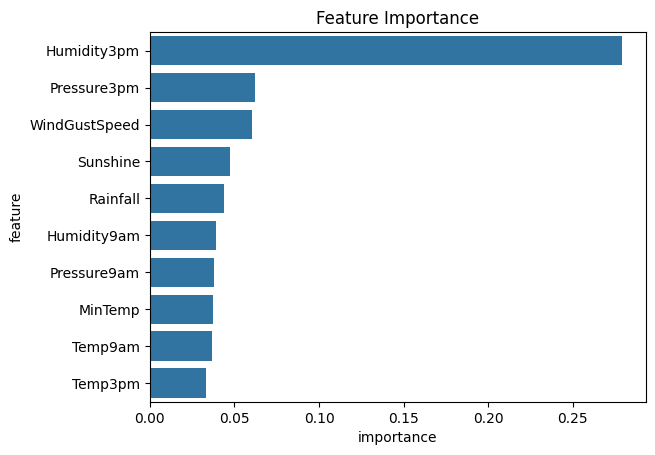

In [41]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [42]:
model = DecisionTreeClassifier(max_depth= 3 , random_state=40)

In [43]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [44]:
model.score(X_train , train_targets)

0.8315916234640977

In [45]:
model.score(X_val , val_targets)

0.8348060155655685

In [46]:
model.classes_

array(['No', 'Yes'], dtype=object)

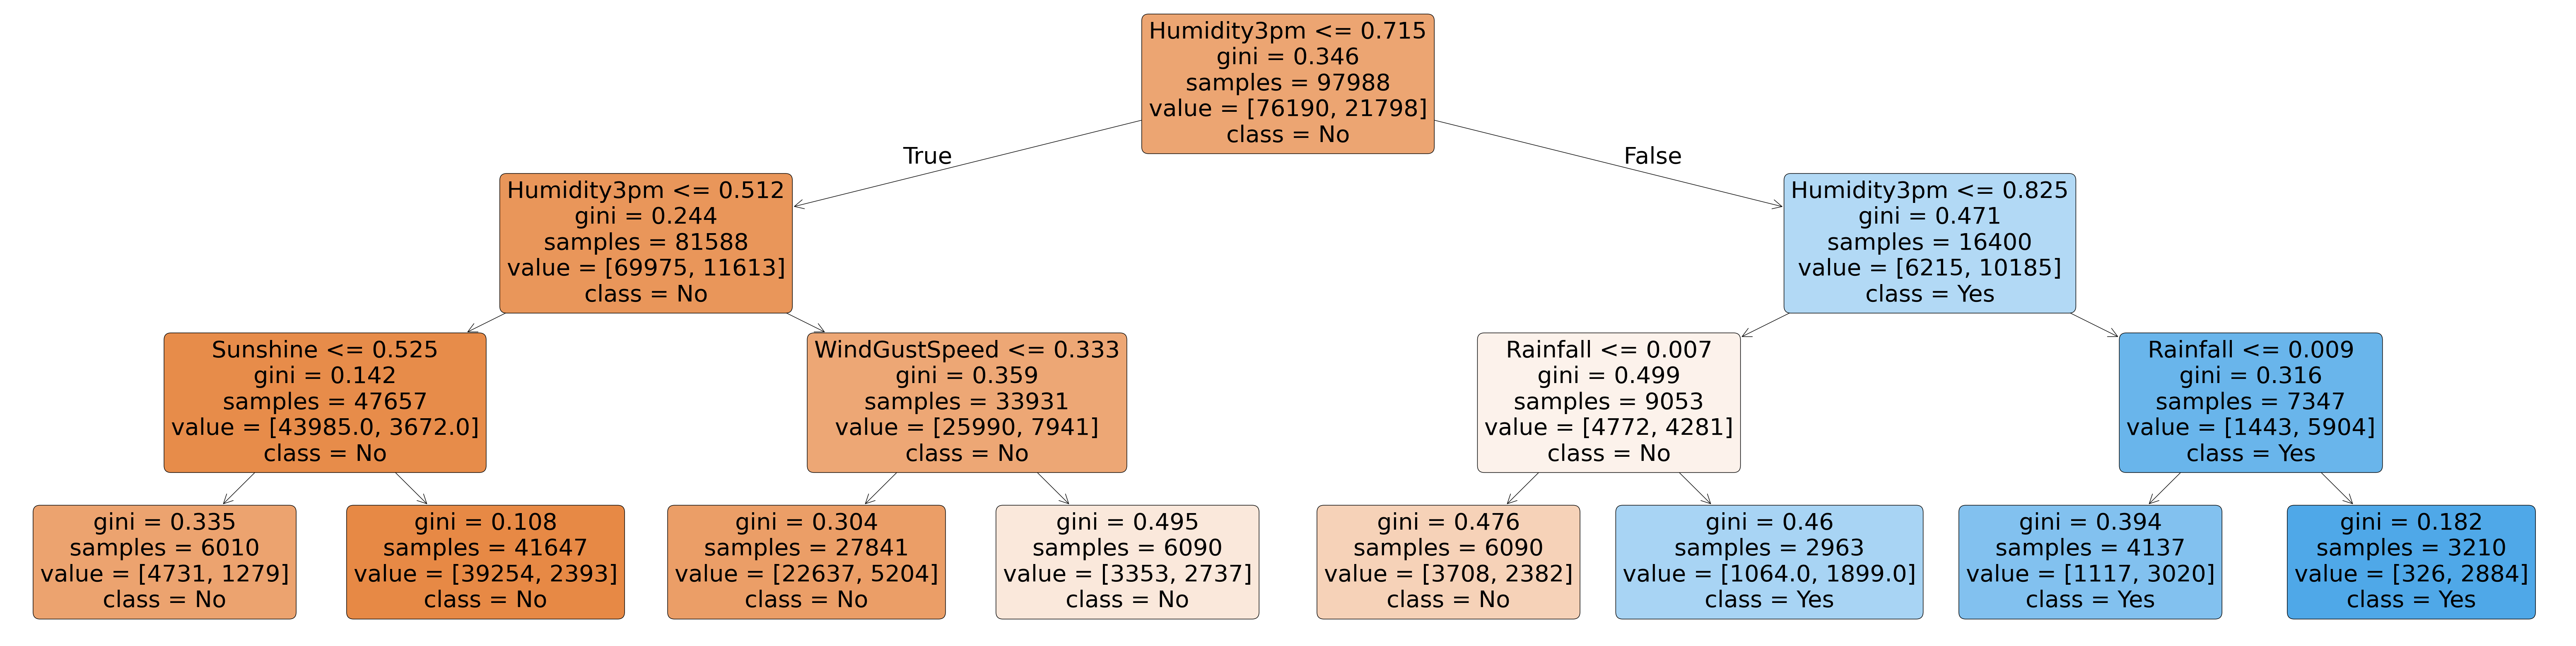

In [47]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [48]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [49]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 14.7 s, sys: 370 ms, total: 15 s
Wall time: 15.1 s


In [50]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154661
7,8,0.144814,0.153959
8,9,0.139435,0.154544
9,10,0.131802,0.154602


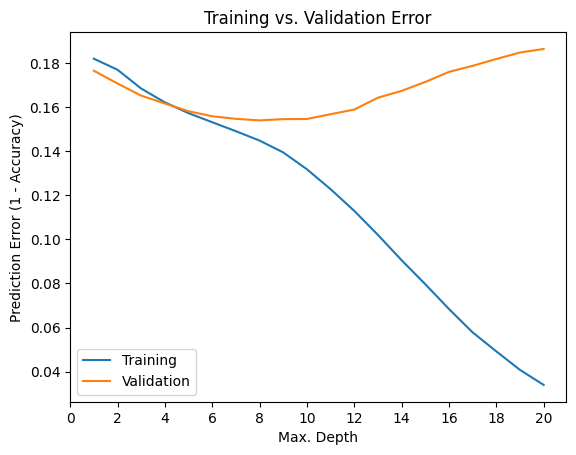

In [51]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [52]:
model = DecisionTreeClassifier(max_depth=11, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8432324887354439

In [54]:
model = DecisionTreeClassifier(max_leaf_nodes=128 , random_state= 40)

In [55]:
model.fit(X_train , train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=40)

In [56]:
model.score(X_train,train_targets)

0.852696248520227

In [57]:
model.score(X_val , val_targets)

0.8471531394464276

[Text(0.5, 0.875, 'x[111] <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'x[111] <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[106] <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[107] <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[111] <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[104] <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[104] <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.93

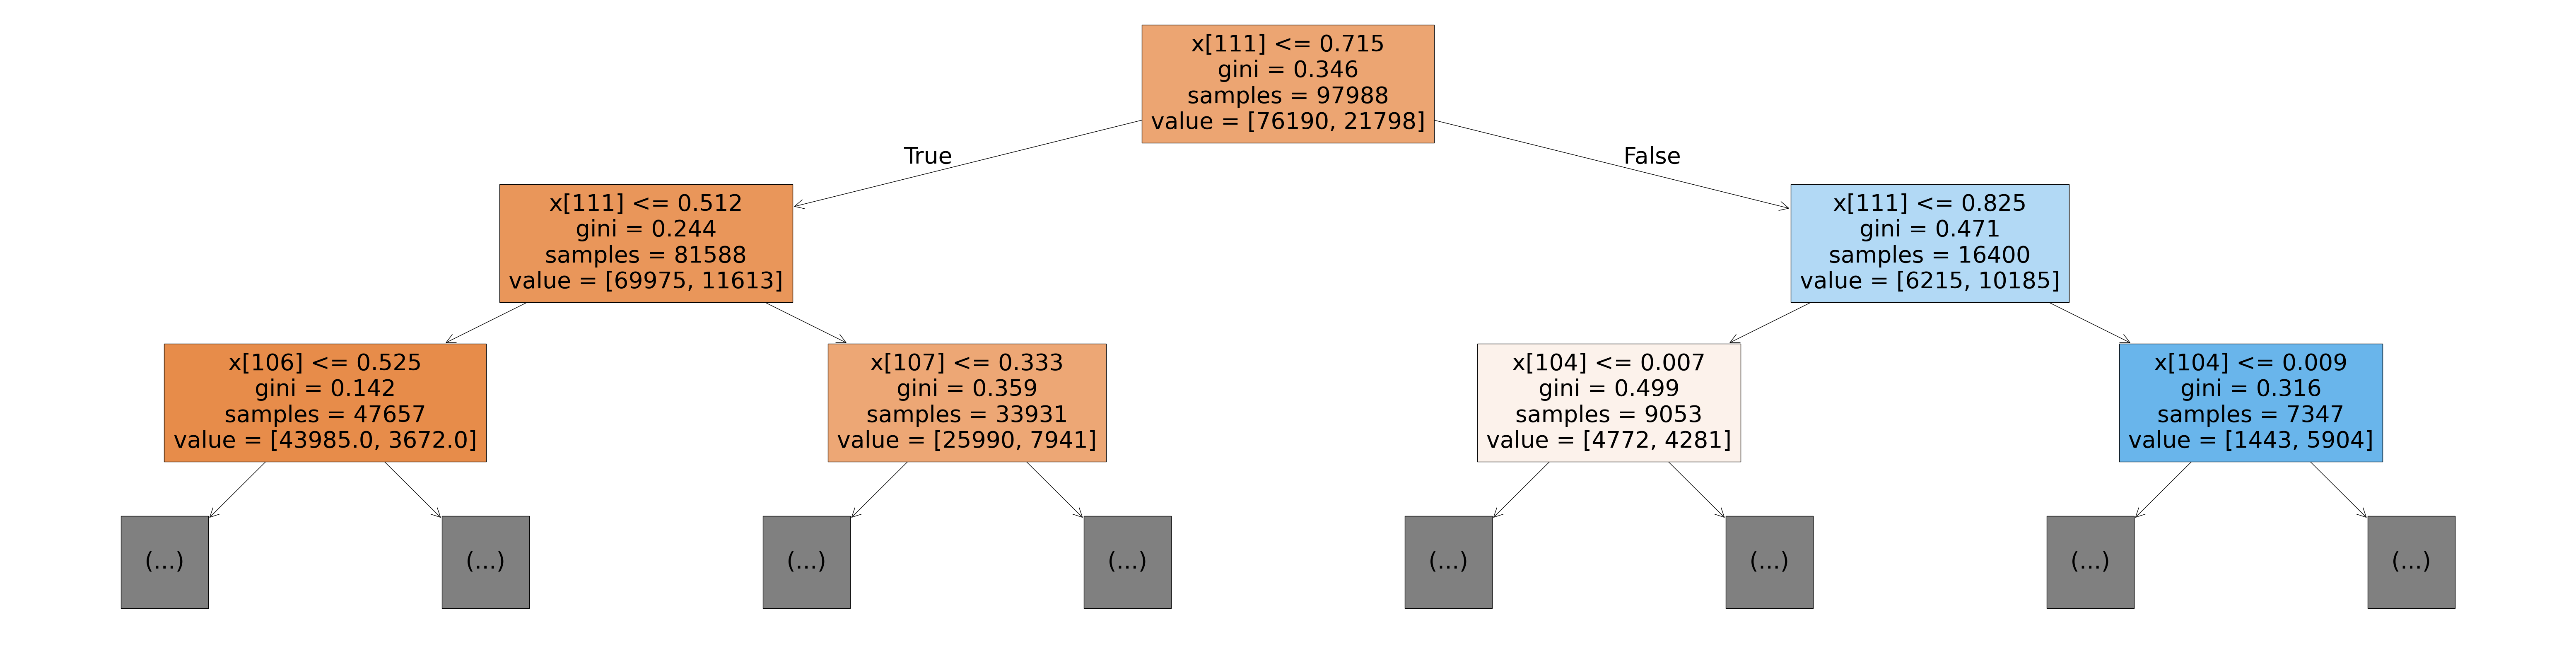

In [63]:
plt.figure(figsize=(80 , 20))
plot_tree(model , max_depth=2 , filled=True)

In [60]:
model.tree_.max_depth

11

In [65]:
from sklearn.ensemble import RandomForestClassifier


In [66]:
model = RandomForestClassifier(n_jobs= -1, random_state=42)

In [67]:
%%time 
model.fit(X_train, train_targets)

CPU times: user 15.3 s, sys: 227 ms, total: 15.5 s
Wall time: 2.08 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [68]:
model.score(X_train, train_targets)

0.9999591786749398

In [69]:
model.score(X_val , val_targets)

0.8563988530633742

In [70]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [71]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [72]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

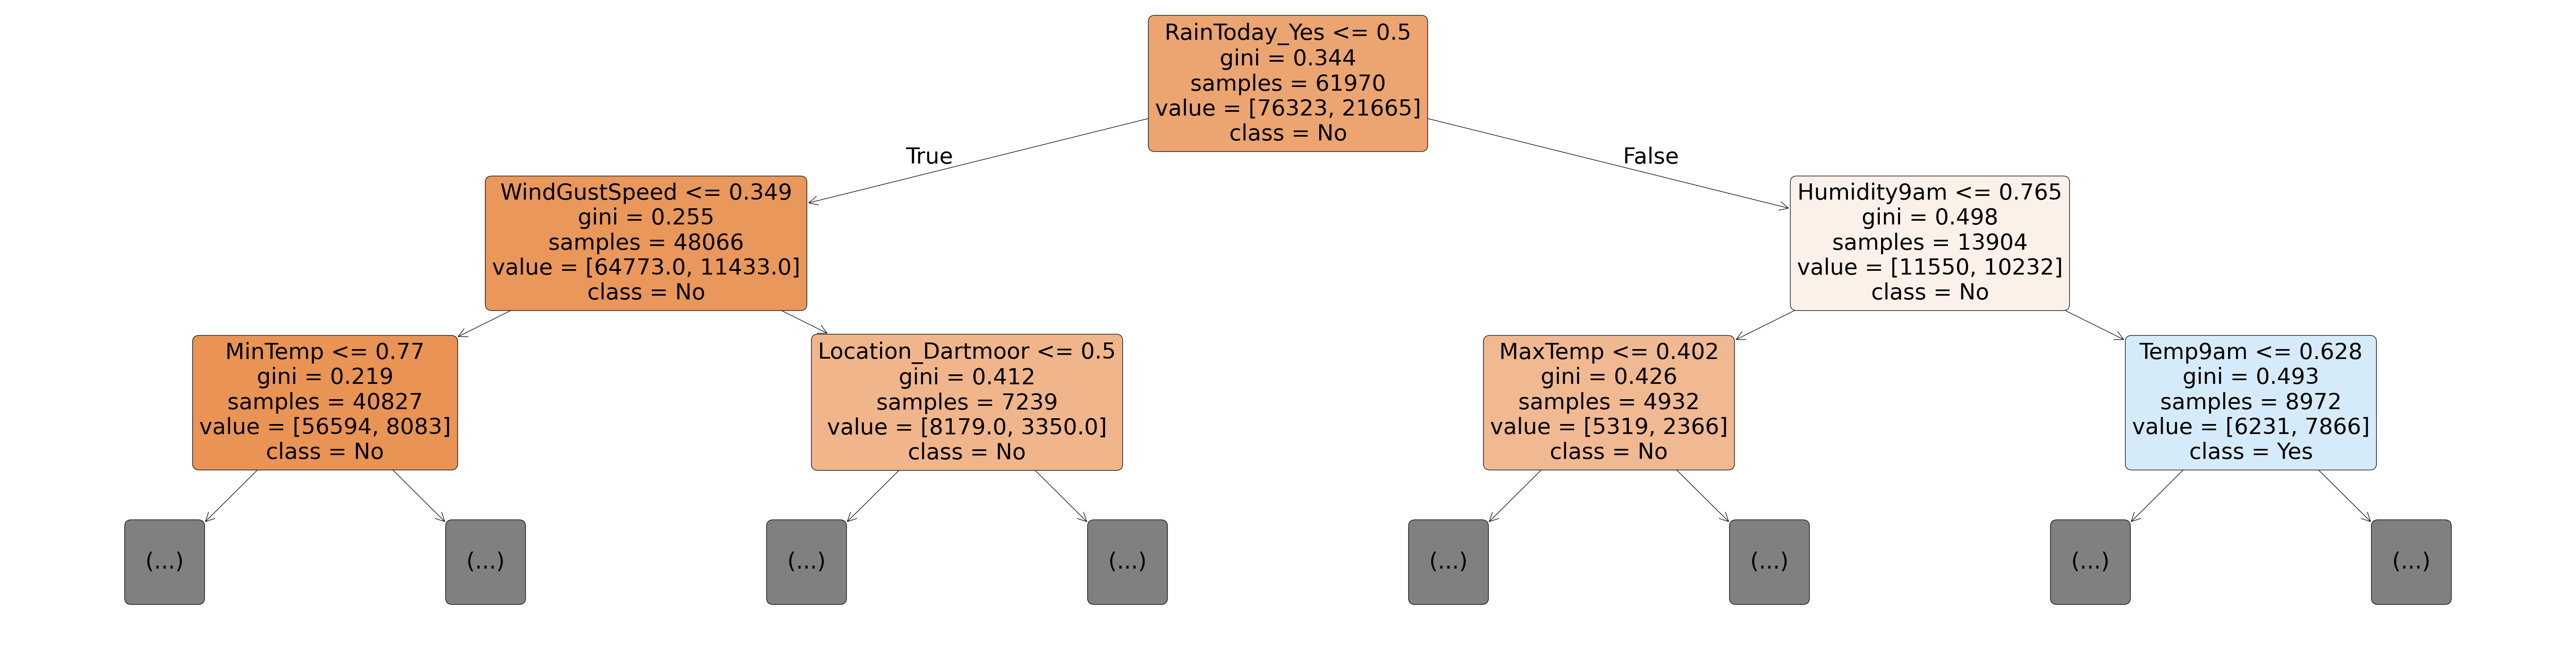

In [84]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[93], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [85]:
length = len(model.estimators_)
print(length)

100


In [86]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [87]:
importance_df.head(10)

,feature,importance
111,Humidity3pm,0.137213
106,Sunshine,0.055512
113,Pressure3pm,0.052665
104,Rainfall,0.050647
110,Humidity9am,0.050458
112,Pressure9am,0.048989
107,WindGustSpeed,0.047649
117,Temp3pm,0.045118
102,MinTemp,0.042069
103,MaxTemp,0.041945


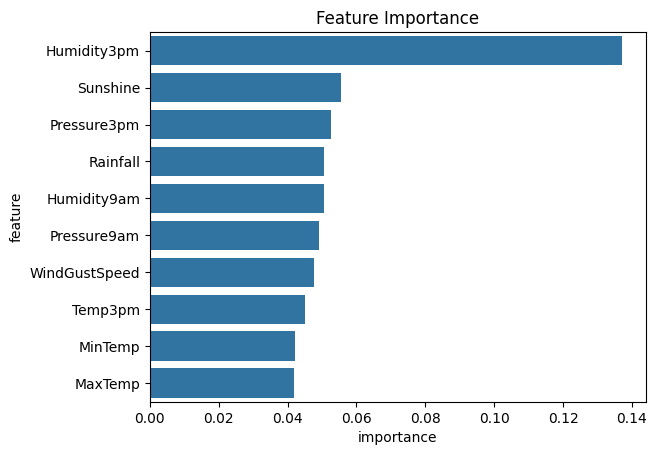

In [88]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [89]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [90]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [91]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999591786749398, 0.8563988530633742)

In [ ]:
#10 estimators ( descison trees )

model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [93]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [94]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9870902559497081, 0.8452805898531219)

In [113]:
#500 estimators parameter tuning

model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50 , max_features='log2')
model.fit(X_train, train_targets)

RandomForestClassifier(max_features='log2', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [111]:
model.score(X_train, train_targets)

0.9996632240682533

In [114]:
model.score(X_val, val_targets)

0.8530048569255076

In [99]:
base_accs

(0.9999591786749398, 0.8563988530633742)

In [115]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [116]:
test_params(max_leaf_nodes=2**5)

(0.833214271135241, 0.8344549125168237)

In [117]:
test_params(max_leaf_nodes=2**20)

(0.9999693840062048, 0.8562818187137925)

In [118]:
test_params(max_features='log2')

(0.9999591786749398, 0.8560477500146293)

In [130]:
test_params(min_samples_split=3, min_samples_leaf=2 , n_estimators = 200 )

(0.9624137649508103, 0.857627713733981)

In [123]:
test_params(min_samples_split=5, min_samples_leaf=6)

(0.8966914316038699, 0.8550529580431857)

In [129]:
test_params(min_impurity_decrease=1e-6)

(0.9890292688900681, 0.8568669904617006)

In [131]:
test_params(bootstrap=False)

(0.9999795893374699, 0.857335127860027)

In [132]:
test_params(max_samples=0.9)

(0.9998775360248193, 0.8572766106852361)

In [133]:
test_params(class_weight='balanced')

(0.9999693840062048, 0.8555796126163029)